In [145]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [162]:
n_task_per_file = 50
n_files = 10
base_dir = "prop/vary_signa_G_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [163]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [164]:
#oper_char_df = oper_char_df[oper_char_df['Method'] != "UV(0.1)"]

In [165]:
oper_char_df.groupby(['SD(Y)', "Method"]).mean()

Coverage Rate      Length         MSE
SD(Y) Method                                            
1.0   RRT               0.919373    5.617316    1.372273
      Tree-Values       0.890162   40.529460    1.153677
      UV(0.1)           0.908566   10.910725    1.335307
2.0   RRT               0.932481   13.859790    4.752556
      Tree-Values       0.892713         inf    4.860728
      UV(0.1)           0.895430   21.821449    4.850553
5.0   RRT               0.942091   54.874379   28.527946
      Tree-Values       0.893971         inf   30.308857
      UV(0.1)           0.896790   54.553623   29.583117
10.0  RRT               0.934220  165.206000  114.389436
      Tree-Values       0.896891  780.143170  120.133147
      UV(0.1)           0.893820  109.107246  116.997073

In [166]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,4.616590,1.162283,RRT,1.0
1,1.000000,5.287472,1.107326,Tree-Values,1.0
2,0.833333,10.910725,1.539952,UV(0.1),1.0
3,1.000000,12.432439,4.396477,RRT,2.0
4,1.000000,13.864856,4.470479,Tree-Values,2.0
...,...,...,...,...,...
595,0.857143,164.348150,33.199287,Tree-Values,5.0
596,1.000000,54.553623,32.860797,UV(0.1),5.0
597,1.000000,151.639077,120.836259,RRT,10.0
598,1.000000,293.754919,130.638300,Tree-Values,10.0


In [167]:
oper_char_df.index = range(oper_char_df.shape[0])

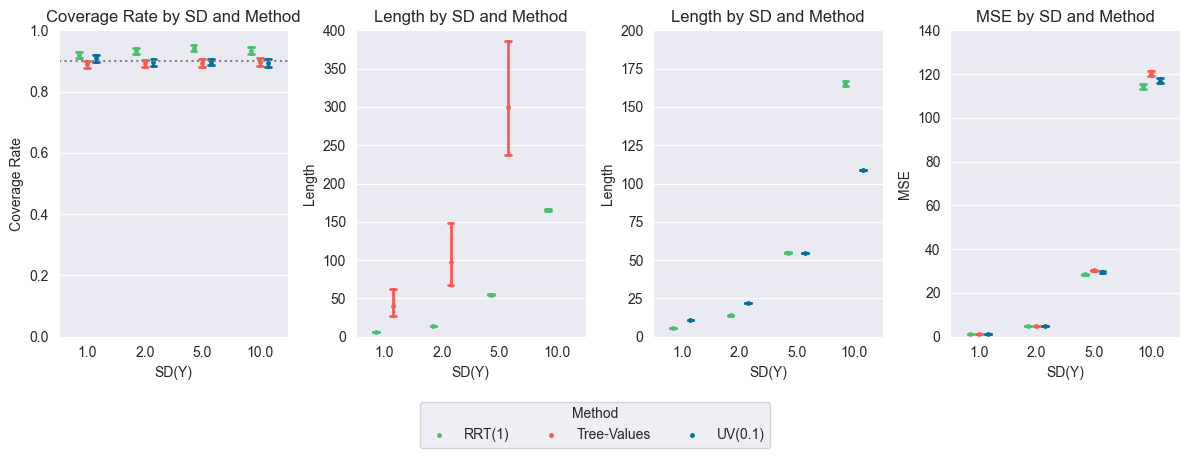

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

oper_char_df['Method'] = oper_char_df['Method'].replace('RRT', 'RRT(1)')

my_palette = {"RRT(1)": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    oper_char_df_i = oper_char_df.copy()
    if i == 1:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "UV(0.1)"]
    elif i == 2:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "Tree-Values"]
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df_i, ax=axes[i],
                  dodge=0.3, linestyle='none', markersize=1.5,
                  err_kws={'linewidth': 2}, capsize=0.1, palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif i == 1:
        axes[i].set_ylim(0,400)
    elif i == 2:
        axes[i].set_ylim(0,200)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [169]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT(1),0.919373,5.617316,1.372273
1,1.0,Tree-Values,0.890162,40.529460,1.153677
2,1.0,UV(0.1),0.908566,10.910725,1.335307
3,2.0,RRT(1),0.932481,13.859790,4.752556
4,2.0,Tree-Values,0.892713,inf,4.860728
5,2.0,UV(0.1),0.895430,21.821449,4.850553
6,5.0,RRT(1),0.942091,54.874379,28.527946
7,5.0,Tree-Values,0.893971,inf,30.308857
8,5.0,UV(0.1),0.896790,54.553623,29.583117
9,10.0,RRT(1),0.934220,165.206000,114.389436


In [44]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [18]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.000000
1,2.0,0.000000
2,5.0,0.027778
3,10.0,0.000000
